# Detection on Child Dataset

In [1]:
import sys
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
asd_data = pd.read_csv(r"C:\Users\HARSHIT\Desktop\mini-project\Autism-Screening-Child-Data Plus Description\csv_result-Autism-Child-Data.csv", na_values=['?'])

In [3]:
asd_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [4]:
asd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [5]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


# Feature Exploration

In [4]:
records = len(asd_data.index)

yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

yes_percent = float(yes) / records *100

print("Total number of records: {}".format(records))
print("Patients diagnoised with disorder: {}".format(yes))
print("Patients not diagnoised with disorder: {}".format(no))
print("Percentage of patients diagnoised with disorder: {:.2f}%".format(yes_percent))

Total number of records: 292
Patients diagnoised with disorder: 141
Patients not diagnoised with disorder: 151
Percentage of patients diagnoised with disorder: 48.29%


# Clean Datasets

In [3]:
# .isnull() will replace the null values with boolean value True and otherwise with False.
# Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
asd_data.loc[
             (asd_data['age'].isnull()) |
             (asd_data['gender'].isnull()) |
             (asd_data['ethnicity'].isnull()) |
             (asd_data['jundice'].isnull())|
             (asd_data['austim'].isnull()) |
             (asd_data['contry_of_res'].isnull())|
             (asd_data['used_app_before'].isnull())|
             (asd_data['result'].isnull())|
             (asd_data['age_desc'].isnull())|
             (asd_data['relation'].isnull())
            ]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
5,6,0,0,1,0,1,1,0,1,0,...,m,NaN,no,yes,Egypt,no,5,4-11 years,NaN,NO
9,10,0,0,1,1,1,0,1,1,0,...,f,NaN,no,yes,Austria,no,5,4-11 years,NaN,NO
11,12,0,1,0,0,1,0,0,0,0,...,f,NaN,no,no,Kuwait,no,3,4-11 years,NaN,NO
19,20,1,1,1,1,1,1,0,1,0,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
21,22,0,0,1,1,0,1,0,1,1,...,f,NaN,no,no,Egypt,no,5,4-11 years,NaN,NO
24,25,1,0,1,1,1,1,0,1,1,...,m,NaN,no,no,Egypt,no,8,4-11 years,NaN,YES
28,29,0,1,1,0,0,0,1,1,0,...,m,NaN,no,yes,United Arab Emirates,no,5,4-11 years,NaN,NO
32,33,1,0,0,1,0,1,1,1,1,...,m,NaN,no,no,Egypt,no,7,4-11 years,NaN,YES


In [4]:
asd_data.dropna(inplace = True) #As the missing data is random, dropna will drop the rows with missing data
asd_data.describe()

'''
here I didn't use mean, median or any other forms to replace 'NaN' values because there are lot of categorical columns
preset in the dataset, and it would make things complicated
'''

"\nhere I didn't use mean, median or any other forms to replace 'NaN' values because there are lot of categorical columns\npreset in the dataset, and it would make things complicated\n"

# Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

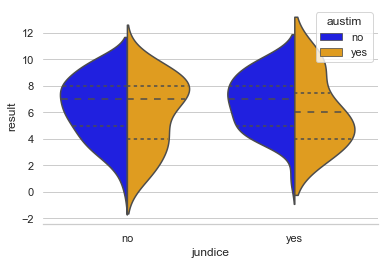

In [9]:
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "orange", 'no': "blue"})
sns.despine(left=True)

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


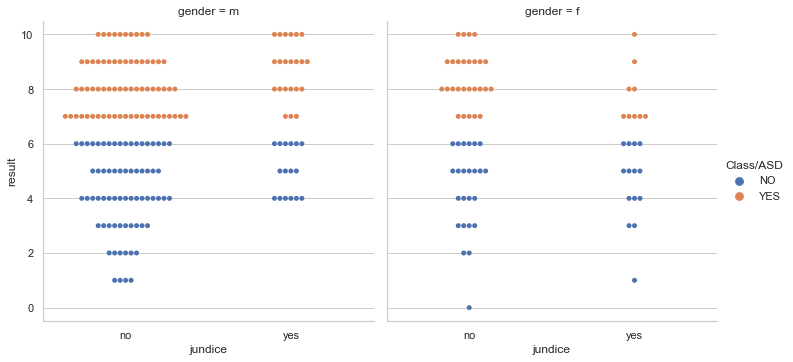

In [10]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


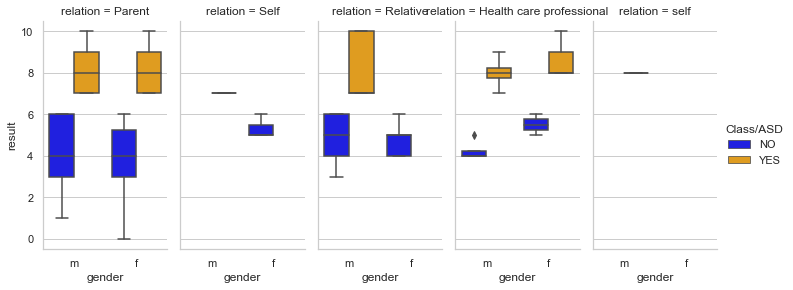

In [11]:
sns.factorplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "orange", 'NO': "blue"});

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


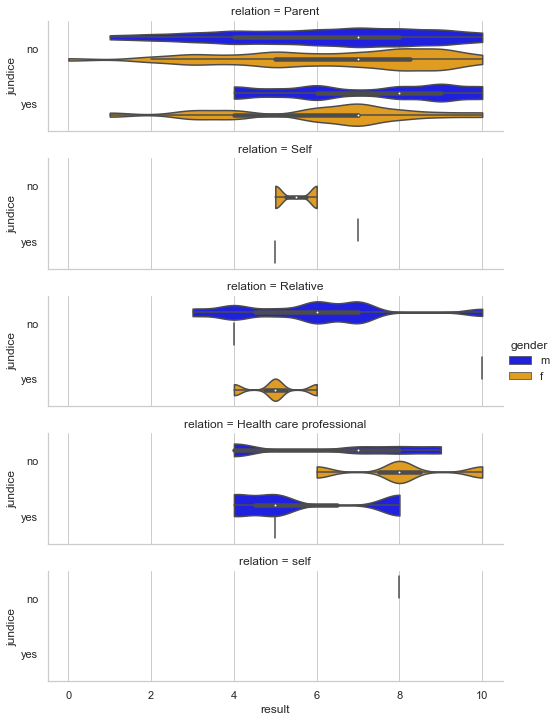

In [12]:
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "orange", 'm': "blue"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In [13]:
"""
In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. 
Both of the occasions I have used factorplot module from seaborn visualization software. In the first case, 
I used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, 
'box' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn.
Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).
"""

"\nIn the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. \nBoth of the occasions I have used factorplot module from seaborn visualization software. In the first case, \nI used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, \n'box' method was used to present the visual way of showing how different features were associated with each other.\n\nNext I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn.\nLet's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).\n"

# Pre-Processing

In [5]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 
                         'contry_of_res', 'result', 'relation',
                         'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
                         'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']]

In [6]:
# Some of our models require the input data to be normalized, 
# so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,Middle Eastern,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
4,0.142857,m,Others,yes,no,United States,1.0,Parent,1,1,1,1,1,1,1,1,1,1
6,0.142857,m,White-European,no,no,United Kingdom,0.7,Parent,1,0,1,1,1,1,0,1,0,1
7,0.142857,f,Middle Eastern,no,no,Bahrain,0.8,Parent,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.428571,f,White-European,yes,yes,United Kingdom,1.0,Parent,1,1,1,1,1,1,1,1,1,1
288,0.428571,f,White-European,yes,yes,Australia,0.4,Parent,1,0,0,0,1,0,1,0,0,1
289,0.000000,m,Latino,no,no,Brazil,0.7,Parent,1,0,1,1,1,1,1,0,0,1
290,0.000000,m,South Asian,no,no,India,0.9,Parent,1,1,1,0,1,1,1,1,1,1


In [7]:
# One-Hot encoding

features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Turkey,contry_of_res_U.S. Outlying Islands,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,relation_Health care professional,relation_Parent,relation_Relative,relation_Self,relation_self
0,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,0.5,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.142857,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
6,0.142857,0.7,1,0,1,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
7,0.142857,0.8,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

79 total features after one-hot encoding.


In [18]:
print(encoded)

['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahrain', 'contry_of_res_Bangladesh', 'contry_of_res_Bhutan', 'contry_of_res_Brazil', 'contry_of_res_Bulgaria', 'contry_of_res_Canada', 'contry_of_res_Costa Rica', 'contry_of_res_Egypt', 'contry_of_res_Europe', 'contry_of_res_Georgia', 'contry_of_res_Germany', 'contry_of_res_Ghana', 'contry_of_res_India', 'contry_of_res_Iraq', 'contry_of_res_Ireland', 'contry_of_res_Isle of Man', 'contry_of_res_Italy', 'c

Text(0, 0.5, 'Frequency')

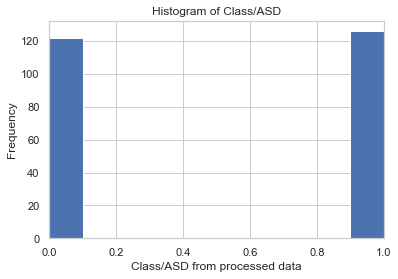

In [19]:
#visualization of classes asd_data dataset

import matplotlib.pyplot as plt

plt.hist(asd_classes, bins=10)

plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

# Shuffle and split data

In [9]:
"""
Now all categorical variables have been converted into numerical features, 
and all numerical features have been normalized. As always, I will now split the data (both features and their labels) 
into training and test sets.
80% of the data will be used for training and 20% for testing.
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

In [21]:
print("Number of samples in Training set : ", X_train.shape[0])
print("Number of samples in testing set : ", X_test.shape[0])

Number of samples in Training set :  198
Number of samples in testing set :  50


# Machine learning techniques

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

[[22  0]
 [ 0 28]]


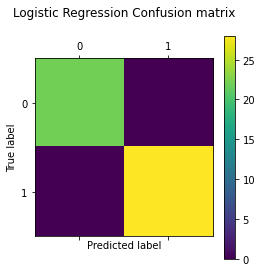

Classification Accuracy : 1.0
Classification Error : 0.0
Senstivity : 1.0
Specificity : 1.0
False Positive Rate : 0.0
Precision : 1.0


In [40]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Logistic Regression Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 1.0
Classification Error : 0.0
Senstivity : 1.0
Specificity : 1.0
False Positive Rate : 0.0
Precision : 1.0


In [35]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9878333333333333

In [36]:
#AUC score (cross validated AUC)

from sklearn.model_selection import cross_val_score
cross_val_score(lr, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9993589743589745

In [64]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = lr.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9459459459459459

## Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
y_pred_class = dtc.predict(X_test)

In [44]:
dtc.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

[[22  0]
 [ 0 28]]


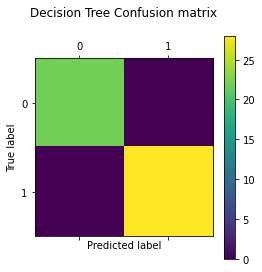

In [45]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

plt.matshow(confusion)
plt.title('Decision Tree Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [46]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 1.0
Classification Error : 0.0
Senstivity : 1.0
Specificity : 1.0
False Positive Rate : 0.0
Precision : 1.0


In [26]:
#Score metric model performance

dtc.score(X_test, y_test)

1.0

In [27]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dtc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [29]:
#AUC score (cross validated AUC)

from sklearn.model_selection import cross_val_score
cross_val_score(dtc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [30]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = dtc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

In [39]:
#Visualization of decision tree algorithm

!pip install pydotplus
import pydotplus 


dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=098bdb6a8441fbf367de1fc21e8fbace7bca20b4f577deaaf7872eaca2973443
  Stored in directory: c:\users\harshit\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


You should consider upgrading via the 'c:\users\harshit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


InvocationException: GraphViz's executables not found

## K- Nearest Neighbor

In [48]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train.values, y_train.values)
y_pred_class = knn.predict(X_test.values)
knn.predict(X_test.values)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

[[20  2]
 [ 0 28]]


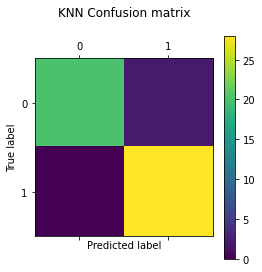

In [49]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('KNN Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.96
Classification Error : 0.04
Senstivity : 1.0
Specificity : 0.9090909090909091
False Positive Rate : 0.09090909090909091
Precision : 0.9333333333333333


In [54]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, features_final.values, asd_classes.values, cv=10)

cv_scores.mean()

0.875

In [63]:
#AUC score (cross validated AUC)

from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final.values, asd_classes.values, cv=10, scoring='roc_auc').mean()

0.9618856837606838

In [62]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test.values)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9459459459459459

In [57]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = []
cvscores = []
for n in range(10, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final.values, asd_classes.values, cv=10)
    neighbors.append(n)
    cvscores.append(cv_scores.mean())

#print(arr)   

print(neighbors[cvscores.index(max(cvscores))])
    
"""
Here I have taken features_final.values  and asd_classes.values because before hand I fitted the model with a data in a dataframe, and then used only the values to predict.
So it was showing this error : "X does not have valid feature names, but KNeighborsClassifier was fitted with feature names"
"""

16


'\nHere I have taken features_final.values  and asd_classes.values because before hand I fitted the model with a data in a dataframe, and then used only the values to predict.\nSo it was showing this error : "X does not have valid feature names, but KNeighborsClassifier was fitted with feature names"\n'

## Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
mnb.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

[[17  5]
 [ 2 26]]


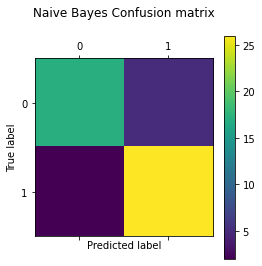

In [54]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [53]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.86
Classification Error : 0.14
Senstivity : 0.9285714285714286
Specificity : 0.7727272727272727
False Positive Rate : 0.22727272727272727
Precision : 0.8387096774193549


In [67]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(mnb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.7986666666666667

In [68]:
#AUC score (cross validated AUC)

from sklearn.model_selection import cross_val_score
cross_val_score(mnb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.8808226495726496

In [69]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = mnb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8552631578947367

# Sequential Model (CNN)

In [25]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [29]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 79))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpfjsgmwfu.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpfjsgmwfu.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 - 14s - loss: 0.6955 - accuracy: 0.4495 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 2/100
13/13 - 0s - loss: 0.6914 - accuracy: 0.5657 - val_loss: 0.6849 - val_accuracy: 0.8200
Epoch 3/100
13/13 - 0s - loss: 0.6882 - accuracy: 0.6061 - val_loss: 0.6805 - val_accuracy: 0.9200
Epoch 4/100
13/13 - 0s - loss: 0.6838 - accuracy: 0.6667 - val_loss: 0.6749 - val_accuracy: 0.9000

Epoch 74/100
13/13 - 0s - loss: 0.2144 - accuracy: 0.9192 - val_loss: 0.1739 - val_accuracy: 0.9600
Epoch 75/100
13/13 - 0s - loss: 0.2146 - accuracy: 0.9394 - val_loss: 0.1711 - val_accuracy: 0.9600
Epoch 76/100
13/13 - 0s - loss: 0.2193 - accuracy: 0.9242 - val_loss: 0.1688 - val_accuracy: 0.9600
Epoch 77/100
13/13 - 0s - loss: 0.1993 - accuracy: 0.9293 - val_loss: 0.1669 - val_accuracy: 0.9600
Epoch 78/100
13/13 - 0s - loss: 0.2186 - accuracy: 0.9242 - val_loss: 0.1661 - val_accuracy: 0.9600
Epoch 79/100
13/13 - 0s - loss: 0.2090 - accuracy: 0.9444 - val_loss: 0.1633 - val_accuracy: 0.9600
Epoch 80/100
13/13 - 0s - loss: 0.1875 - accuracy: 0.9545 - val_loss: 0.1608 - val_accuracy: 0.9600
Epoch 81/100
13/13 - 0s - loss: 0.1967 - accuracy: 0.9293 - val_loss: 0.1594 - val_accuracy: 0.9600
Epoch 82/100
13/13 - 0s - loss: 0.1887 - accuracy: 0.9495 - val_loss: 0.1598 - val_accuracy: 0.9800
Epoch 83/100
13/13 - 0s - loss: 0.1874 - accuracy: 0.9444 - val_loss: 0.1579 - val_accuracy: 0.9600


In [33]:
#accuracy
model.evaluate(X_test, y_test, verbose=0)[1]

0.9599999785423279

In [36]:
predictions = model.predict_classes(X_test)
predictions

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

[[21  1]
 [ 1 27]]


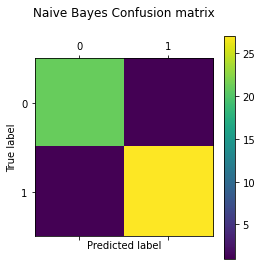

In [55]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()